In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Loading the data

In [2]:
def load_data():
    return pd.read_csv('Titanic_ISTE.csv')

In [3]:
data = load_data()

# Data Cleaning

In [4]:
data = data.drop(['Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Cabin','Ticket','PassengerId','Name'], axis=1)

### Filling NaN entries in the columns

In [5]:
median = data['Age'].median()
data['Age'].fillna(median, inplace=True)
data['Embarked'].fillna('S', inplace=True)
data['Sex'].fillna('male', inplace=True)
median = data['SibSp'].median()
data['SibSp'].fillna(median, inplace=True)
data['bias'] = [1]*891
median = data['Parch'].median()
data['Parch'].fillna(median, inplace=True)
data['Survived'].fillna(0, inplace=True)
data['Pclass'].fillna(3.0, inplace=True)

### Normalization

In [6]:
data['Age'] = data['Age']/data['Age'].mean()
data['Fare'] = data['Fare']/data['Fare'].mean()

### Encoding Categorical Attributes

In [7]:
col = pd.get_dummies(data['Embarked']).drop(['S'],axis='columns').astype('int64')
data = pd.concat([data,col],axis='columns').drop('Embarked',axis='columns')

col = pd.get_dummies(data['Sex']).drop(['male'],axis='columns').astype('int64')
data = pd.concat([data,col],axis='columns').drop('Sex',axis='columns')

In [8]:
data.reset_index(drop=True)

,Survived,Pclass,Age,SibSp,Parch,Fare,bias,C,Q,female
0,0.0,3.0,0.749852,1.0,0.0,0.225126,1,0,0,0
1,1.0,1.0,1.295198,1.0,0.0,2.213478,1,1,0,1
2,1.0,3.0,0.886188,0.0,0.0,0.246086,1,0,0,1
3,1.0,1.0,1.192946,1.0,0.0,1.648853,1,0,0,1
4,0.0,3.0,1.192946,0.0,0.0,0.249967,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,0.920273,0.0,0.0,0.403674,1,0,0,0
887,1.0,1.0,0.647599,0.0,0.0,0.931555,1,0,0,1
888,0.0,3.0,0.954357,1.0,2.0,0.728166,1,0,0,1
889,1.0,1.0,0.886188,0.0,0.0,0.931555,1,1,0,0


# Creating a test set

In [9]:
def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(data, 0.2)
print(len(train_set))
print(len(test_set))

713
178


In [10]:
train_features = train_set.drop("Survived", axis=1)
train_labels = train_set["Survived"].copy()

test_features = test_set.drop("Survived", axis=1)
test_labels = test_set["Survived"].copy()

# Model

In [11]:
class LogisticRegression():
    
    def __init__(self,_input,_labels,epochs):
        self._input = _input
        self._labels = _labels
        self.weights = np.zeros([9,1])
        self.epochs = epochs
        self.cost_func_graph = []
        self.output = []
    
    def activation(self,x):
        return 1/(1+np.exp(-x)) 
    
    def _feedforward(self):
        return self.activation(np.matmul(self._input,self.weights))
    
    def _gradient_descent(self,output):
        self.weights = self.weights - np.dot((output.T-self._labels.T),self._input).T/713 + self.weights/713
        return self.weights
    
    def _cost_function(self,output):
        a = np.dot(self._labels.T,np.log(output))
        b = np.dot((1-self._labels).T,np.log(1-output))
        return float(-np.sum(a+b)/713)
    
    def fit(self):
        for i in tqdm(range(self.epochs)):
            self.output = self._feedforward()
            self.weights = self._gradient_descent(self.output)
            self.cost_func_graph.append(self._cost_function(self.output))
    
    def evaluate(self):
        out_array = []
        correct = 0
        labels = np.array(self._labels)
        for i in np.array(self.output):
            if i>=0.5:
                out_array.append(1.0)
            else:
                out_array.append(0.0)  
        for i in range(713):
            if out_array[i] == labels[i]:
                correct += 1
        return (correct/713)*100
    
    def predict(self,test_features,test_labels):
        output = self.activation(np.matmul(test_features,self.weights))
        out_array = []
        correct = 0
        labels = np.array(test_labels)
        for i in np.array(output):
            if i>=0.5:
                out_array.append(1.0)
            else:
                out_array.append(0.0)  
        for i in range(178):
            if out_array[i] == labels[i]:
                correct += 1
        return (correct/178)*100
    
    def graph(self):
        if len(self.cost_func_graph) == 0:
            print("The data has not been trained yet")
        else:
            plt.figure(figsize=(10,6))
            plt.plot([i for i in range(self.epochs)],self.cost_func_graph)
            plt.xlabel("Epochs")
            plt.ylabel("Cost_Function")
            plt.grid(True)

In [12]:
model = LogisticRegression(train_features,train_labels,100)

In [13]:
model.fit()

100%|██████████| 100/100 [00:00<00:00, 672.24it/s]


In [14]:
model.evaluate()

80.64516129032258

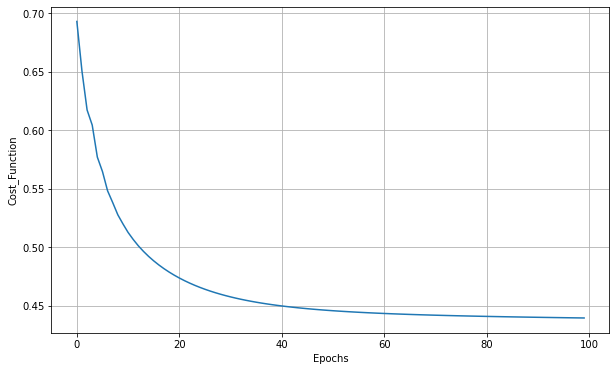

In [15]:
model.graph()

# Testing the data

In [16]:
model.predict(test_features,test_labels)

78.65168539325843